# Datium Insights Technical Test

### Load libraries

In [56]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np


pd.options.display.max_columns = None

### Load datasets

In [3]:
train_dataset_path = r"../datasets/DatiumTrain.rpt"
test_dataset_path = r"../datasets/DatiumTest.rpt"


In [4]:

train_dataset = pd.read_csv(train_dataset_path, delimiter="\t")

/var/folders/8b/2xzjkyq14dz6gp0ygflgcj6w0000gn/T/ipykernel_11683/1506721180.py:1: DtypeWarning: Columns (27,94) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset = pd.read_csv(train_dataset_path, delimiter="\t")


## Exploration of training dataset

In [5]:
train_dataset.shape

(50704, 130)

In [6]:
train_dataset.head()

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,LimitedEdition,Series,SeriesModelYear,BadgeDescription,BadgeSecondaryDescription,BodyStyleDescription,BodyConfigDescription,WheelBaseConfig,Roofline,ExtraIdentification,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,DoorNum,EngineSize,EngineDescription,Cylinders,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelCapacity,FuelDeliveryDescription,MethodOfDeliveryDescription,GrossCombinationMAss,GrossVehicleMass,VIN,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMFrom,PowerRPMTo,Torque,TorqueRPMFrom,TorqueRPMTo,RonRating,SeatCapacity,ModelCode,BuildCountryOriginDescription,ValvesCylinder,EngineCycleDescription,EngineConfigurationDescription,EngineLocation,EngineNum,Acceleration,FrontTyreSize,RearTyreSize,FrontRimDesc,RearRimDesc,TowingBrakes,TowingNoBrakes,WarrantyCustAssist,FreeScheduledService,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,AltEngEngineType,AltEngBatteryType,AltEngCurrentType,AltEngAmpHours,AltEngVolts,AltEngChargingMethod,AltEngPower,AltEngPowerFrom,AltEngPowerTo,AltEngTorque,AltEngTorqueFrom,AltEngTorqueTo,AltEngDrive,NormalChargeMins,QuickChargeMins,NormalChargeVoltage,QuickChargeVoltage,KMRangeElectricEng,ElectricEngineLocation,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,EmissionStandard,MaxEthanolBlend,AncapRating,VFactsClass,VFactsSegment,VFactsPrice,IsPPlateApproved,AverageKM,GoodKM,AvgWholesale,AvgRetail,GoodWholesale,GoodRetail,TradeMin,TradeMax,PrivateMax,NewPrice,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date,Age_Comp_Months,KM,Sold_Amount
0,Holden,Commodore,HOLD,COMMODO,2008,0,0,VE Omega Sedan 4dr. Auto 4sp 3.6i,F,L,F,VE,NaN,Omega,NaN,Sedan,NaN,NaN,NaN,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4.0,4,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,73.0,Multi-Point Injection,Electronic Sequential,NaN,NaN,6G1EK52B#8L######,2915.0,1476.0,4894.0,1899.0,1690.0,1622.0,NaN,180.0,NaN,6000.0,330.0,NaN,2600.0,91.0,5.0,8EK69-114,AUSTRALIA,4.0,4 Stroke,V60,Front,HBA04 ######,NaN,225/60 R16,225/60 R16,16x7.0,16x7.0,2100.0,NaN,3yr Roadside,NaN,3.0,100000.0,15000.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,260.0,NaN,NaN,NaN,NaN,10.9,NaN,NaN,4.0,Passenger,Large,< $70K,T,230.0,140.0,2500.0,5000.0,3850.0,6450.0,2100.0,3500.0,5500.0,34790.0,White,Perth (WA),Auction,2015-11-03 00:00:00.000,02/2008,93.0,227878.0,2000.0
1,Holden,Commodore,HOLD,COMMODO,1993,7,41,VR Executive Wagon 5dr. Auto 4sp 3.8i,F,L,F,VR,NaN,Executive,NaN,Wagon,NaN,NaN,NaN,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4.0,5,3791,3.8,6,Petrol - Unleaded ULP,Aspirated,PASS,Pushrod,Piston,68.0,Multi-Point Injection,Electronic,NaN,NaN,6H8VRK35HPL######,2822.0,1478.0,4903.0,1794.0,1380.0,1380.0,NaN,130.0,NaN,4800.0,295.0,NaN,3200.0,NaN,5.0,NaN,AUSTRALIA,2.0,4 Stroke,V90,Front,VH-######,NaN,205/65 R15,205/65 R15,15x6.0,15x6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.6,9.2,NaN,NaN,NaN,Passenger,Large,< $70K,T,600.0,360.0,NaN,NaN,NaN,2250.0,NaN,NaN,2000.0,27978.0,Red,Belmore (NSW),Auction,2000-10-18 00:00:00.000,08/1993,86.0,153091.0,6800.0
2,Toyota,RAV4,TOYO,RAV4,2012,0,6,ACA33R MY12 CV Wagon 5dr Man 5sp 4x4 2.4i,F,L,F,ACA33R,MY12,CV,NaN,Wagon,NaN,NaN,NaN,NaN,4X4 On Demand,4XO,Manual,Floor,5.0,5,2362,2.4,4,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,60.0,Multi-Point Injection,Electronic Sequential,3560.0,2060.0,JTMBD33V*05######,2660.0,1695.0,4625.0,1815.0,1545.0,1510.0,515.0,125.0,NaN,6000.0,224.0,NaN,4000.0,91.0,5.0,ACA33R-ANMXKQ,JAPAN,4.0,4 Stroke,In-line,Front,2AZ-#######,NaN,225/65 R17,225/65 R17,17x6.5,17x6.5,1500.0,750.0,

In [7]:
train_dataset.describe()

,YearGroup,MonthGroup,SequenceNum,GearNum,DoorNum,EngineSize,Cylinders,FuelCapacity,GrossCombinationMAss,GrossVehicleMass,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMFrom,PowerRPMTo,Torque,TorqueRPMFrom,TorqueRPMTo,RonRating,SeatCapacity,ValvesCylinder,Acceleration,TowingBrakes,TowingNoBrakes,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,AltEngAmpHours,AltEngVolts,AltEngPower,AltEngPowerFrom,AltEngPowerTo,AltEngTorque,AltEngTorqueFrom,AltEngTorqueTo,NormalChargeMins,QuickChargeMins,NormalChargeVoltage,QuickChargeVoltage,KMRangeElectricEng,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,AncapRating,AverageKM,GoodKM,AvgWholesale,AvgRetail,GoodWholesale,GoodRetail,TradeMin,TradeMax,PrivateMax,NewPrice,Age_Comp_Months,KM,Sold_Amount
count,50704.000000,50704.000000,50704.000000,50703.000000,50704.000000,50704.000000,50704.000000,49892.000000,24524.000000,30463.000000,50561.000000,49985.000000,50045.000000,50047.000000,49170.000000,40153.000000,25615.000000,50592.000000,209.000000,50566.000000,50431.000000,4699.000000,50396.000000,39737.000000,50667.000000,50194.000000,15130.000000,47760.000000,45504.000000,48090.000000,47739.000000,30732.000000,27891.000000,30746.000000,6.000000,836.000000,836.000000,156.000000,237.000000,785.000000,0.0,164.00000,0.0,0.0,0.0,0.0,2.0,2.0,24644.000000,24630.000000,24821.000000,33730.000000,12112.000000,12110.000000,29394.000000,28241.000000,46346.000000,25965.000000,50703.000000,50703.000000,37594.000000,45973.000000,43951.000000,50703.000000,37594.000000,37594.000000,50703.000000,50703.000000,50659.000000,5.070200e+04,50700.000000
mean,2005.177777,1.480396,9.632869,4.615447,4.124467,3000.569580,5.061731,71.905035,4237.271489,2353.787874,2795.959890,1575.180834,4769.513758,1809.761105,1583.991499,1553.754937,778.293031,136.335146,3887.081340,5249.226753,286.095953,1900.404341,3454.733352,91.228301,4.888902,3.518827,9.574197,1803.142274,629.580916,3.101851,92852.096839,6691.819602,5.245420,9.609640,6.266667,542.083254,82.557895,1193.333333,5268.270042,280.834395,NaN,1193.04878,NaN,NaN,NaN,NaN,37.0,120.0,5.701530,5.819610,3.323819,232.896294,283.967801,171.276879,11.587654,7.170908,9.476818,4.260312,306.617163,188.857168,7518.701123,8928.714680,8223.517099,10038.255133,6556.740437,8468.244933,9018.105438,36726.014555,45.775223,8.495406e+04,16401.722226
std,5.302207,2.997782,11.171761,0.956656,0.868757,931.057061,1.123823,22.131647,1090.250085,506.228417,196.377199,180.821663,316.896285,78.646715,282.673958,276.970755,311.324374,41.839118,799.895184,875.834698,88.995227,752.174969,850.284910,0.991823,1.280512,0.848572,1.843429,632.023565,139.894331,0.490317,32103.990718,4848.229330,3.470849,2.818618,0.361478,165.663202,30.820288,41.228448,5513.802631,72.269200,NaN,67.03518,NaN,NaN,NaN,NaN,0.0,0.0,1.128458,1.824878,0.724334,49.219886,63.595995,34.881419,2.642395,1.392198,2.102242,0.654834,139.121984,88.032477,7092.971211,7873.691056,7556.364122,8454.463138,6474.531721,7049.352627,7709.541957,15522.567237,32.153830,7.283732e+04,10312.029249
min,1968.000000,0.000000,0.000000,1.000000,2.000000,659.000000,2.000000,32.000000,1450.000000,970.000000,2.000000,1070.000000,2500.000000,1370.000000,640.000000,720.000000,260.000000,32.000000,3000.000000,2600.000000,67.000000,1000.000000,1200.000000,91.000000,2.000000,2.000000,3.900000,200.000000,100.000000,1.000000,-1.000000,1000.000000,1.000000,3.000000,5.800000,100.000000,10.000000,940.000000,1500.000000,78.000000,NaN,940.00000,NaN,NaN,NaN,NaN,37.0,120.0,1.500000,0.500000,0.500000,89.000000,86.000000,86.000000,3.700000,3.700000,3.900000,1.000000,35.000000,20.000000,600.000000,1500.000000,800.000000,750.000000,300.000000,1800.000000,700.000000,5157.000000,0.000000,0.000000e+00,0.000000
25%,2001.000000,0.000000,1.000000,4.000000,4.000000,2359.000000,4.000000,63.000000,3310.000000,1990.000000,2670.000000,1450

## Clean nulls

In [8]:
nulls = train_dataset.isnull().sum()

<AxesSubplot: >

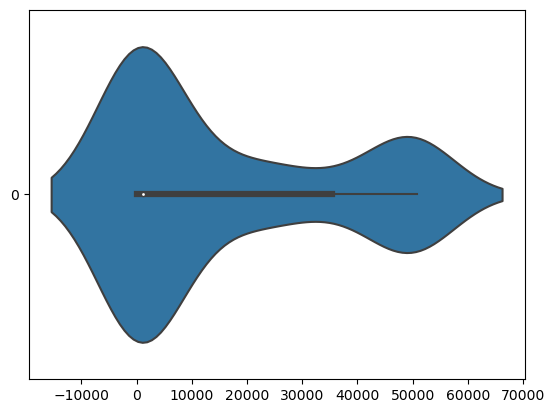

In [10]:
sns.violinplot(nulls,orient="h")

Check columns with large number of missing data

In [11]:
len(nulls[nulls > nulls.median()])

65

In [30]:
nulls.median()

1219.0

In [ ]:
nulls.quantile(0.75)

35471.5

In [32]:
nulls.max()

50704

In [13]:
null_percentage = nulls/len(train_dataset)

In [44]:
len(null_percentage[null_percentage > 0.1])

58

### Drop any columns with more than 10% of data missing

In [46]:
def clean_nulls_by_percentage(input_df:pd.DataFrame):

    """
        cleaning step to clean null values from the training dataframe.

        Cleaning strategy:
        Remove columns entirely with a null percentage > 10
    """

    #Drop cols with more than 50% null
    df = input_df.copy()
    nulls = df.isnull().sum()/len(df)
    cols_to_drop = nulls[nulls > 0.1]
    df.drop(list(cols_to_drop.index), axis=1, inplace= True)

    return df, cols_to_drop



In [47]:
train_dataset_clean_null, cols_dropped = clean_nulls_by_percentage(train_dataset)

In [48]:
train_dataset_clean_null.shape

(50704, 72)

In [55]:
print(f"Columns dropped with more than 10% nulls: \n{list(cols_dropped.index)}")

Columns dropped with more than 10% nulls: 
['SeriesModelYear', 'BadgeDescription', 'BadgeSecondaryDescription', 'BodyConfigDescription', 'WheelBaseConfig', 'Roofline', 'ExtraIdentification', 'GrossCombinationMAss', 'GrossVehicleMass', 'TareMass', 'PayLoad', 'PowerRPMFrom', 'TorqueRPMFrom', 'RonRating', 'ModelCode', 'Acceleration', 'TowingNoBrakes', 'WarrantyCustAssist', 'FreeScheduledService', 'FirstServiceKM', 'FirstServiceMonths', 'RegServiceMonths', 'AltEngEngineType', 'AltEngBatteryType', 'AltEngCurrentType', 'AltEngAmpHours', 'AltEngVolts', 'AltEngChargingMethod', 'AltEngPower', 'AltEngPowerFrom', 'AltEngPowerTo', 'AltEngTorque', 'AltEngTorqueFrom', 'AltEngTorqueTo', 'AltEngDrive', 'NormalChargeMins', 'QuickChargeMins', 'NormalChargeVoltage', 'QuickChargeVoltage', 'KMRangeElectricEng', 'ElectricEngineLocation', 'TopSpeedElectricEng', 'GreenhouseRating', 'AirpollutionRating', 'OverallGreenStarRating', 'CO2Combined', 'CO2Urban', 'CO2ExtraUrban', 'FuelUrban', 'FuelExtraurban', 'Emiss

### Drop rows with missing categorical value

Drop the rows with missing categorical values, not to attempt imputation later

In [59]:
numerical_cols = train_dataset_clean_null.select_dtypes(include=np.number).columns
non_numerical_cols = list(set(train_dataset_clean_null.columns).difference(set(numerical_cols)))


In [65]:
print(non_numerical_cols)

['VFactsClass', 'EngineLocation', 'Sold_Date', 'SaleCategory', 'MakeCode', 'FamilyCode', 'VFactsSegment', 'BodyStyleDescription', 'EngineTypeDescription', 'Model', 'FrontTyreSize', 'RearTyreSize', 'VIN', 'InductionDescription', 'Description', 'Make', 'ImportFlag', 'GearTypeDescription', 'FrontRimDesc', 'FuelDeliveryDescription', 'FuelTypeDescription', 'Branch', 'EngineConfigurationDescription', 'DriveCode', 'OptionCategory', 'LimitedEdition', 'Series', 'EngineCycleDescription', 'IsPPlateApproved', 'Compliance_Date', 'CurrentRelease', 'DriveDescription', 'GearLocationDescription', 'RearRimDesc', 'EngineNum', 'MethodOfDeliveryDescription', 'Colour', 'BuildCountryOriginDescription', 'EngineDescription', 'CamDescription']


In [61]:
train_dataset_drop_non_numerical_null_rows = train_dataset_clean_null.iloc[train_dataset_clean_null[non_numerical_cols].dropna().index]

In [63]:
train_dataset_drop_non_numerical_null_rows.shape

(46855, 72)

In [66]:
def drop_non_numerical_nulls(input_df:pd.DataFrame):
    """
        Drop rows that has null in non-numerical columns
    """
    df = input_df.copy()

    numerical_cols = train_dataset_clean_null.select_dtypes(include=np.number).columns
    non_numerical_cols = list(set(train_dataset_clean_null.columns).difference(set(numerical_cols)))
    
    df = df.iloc[df[non_numerical_cols].dropna().index]

    return df